In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
#let's see what kind of unique values all the needed columns hold
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [6]:
# Let's check how is there any missing or null values?
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
pseudo_data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
pseudo_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# since what we need to do is ... To substract the year from current year (2022) to know how much old the car is to do the 
# further analysis, firstly we will be adding a column to the dataset which has current year date.
pseudo_data[['Current_year']]= 2022

In [12]:
pseudo_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [13]:
pseudo_data['no_ofyear']= pseudo_data['Current_year']- pseudo_data['Year']

In [14]:
pseudo_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_ofyear
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [15]:
# drop Year and current year form pseudo_data
pseudo_data.drop(['Current_year'] ,axis=1, inplace= True )

In [16]:
pseudo_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_ofyear
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
final_dataset= pseudo_data

In [18]:
(pseudo_data['Fuel_Type'] == 'Diesel').sum()

60

In [19]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [20]:
final_dataset.head(15)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_ofyear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,8,0,1,0,1
1,2013,4.75,9.54,43000,0,9,1,0,0,1
2,2017,7.25,9.85,6900,0,5,0,1,0,1
3,2011,2.85,4.15,5200,0,11,0,1,0,1
4,2014,4.60,6.87,42450,0,8,1,0,0,1
5,2018,9.25,9.83,2071,0,4,1,0,0,1
6,2015,6.75,8.12,18796,0,7,0,1,0,1
7,2015,6.50,8.61,33429,0,7,1,0,0,1
8,2016,8.75,8.89,20273,0,6,1,0,0,1
9,2015,7.45,8.92,42367,0,7,1,0,0,1


In [21]:
#let's see the correlation between the values
final_dataset.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_ofyear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_ofyear,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [22]:
import seaborn as sns

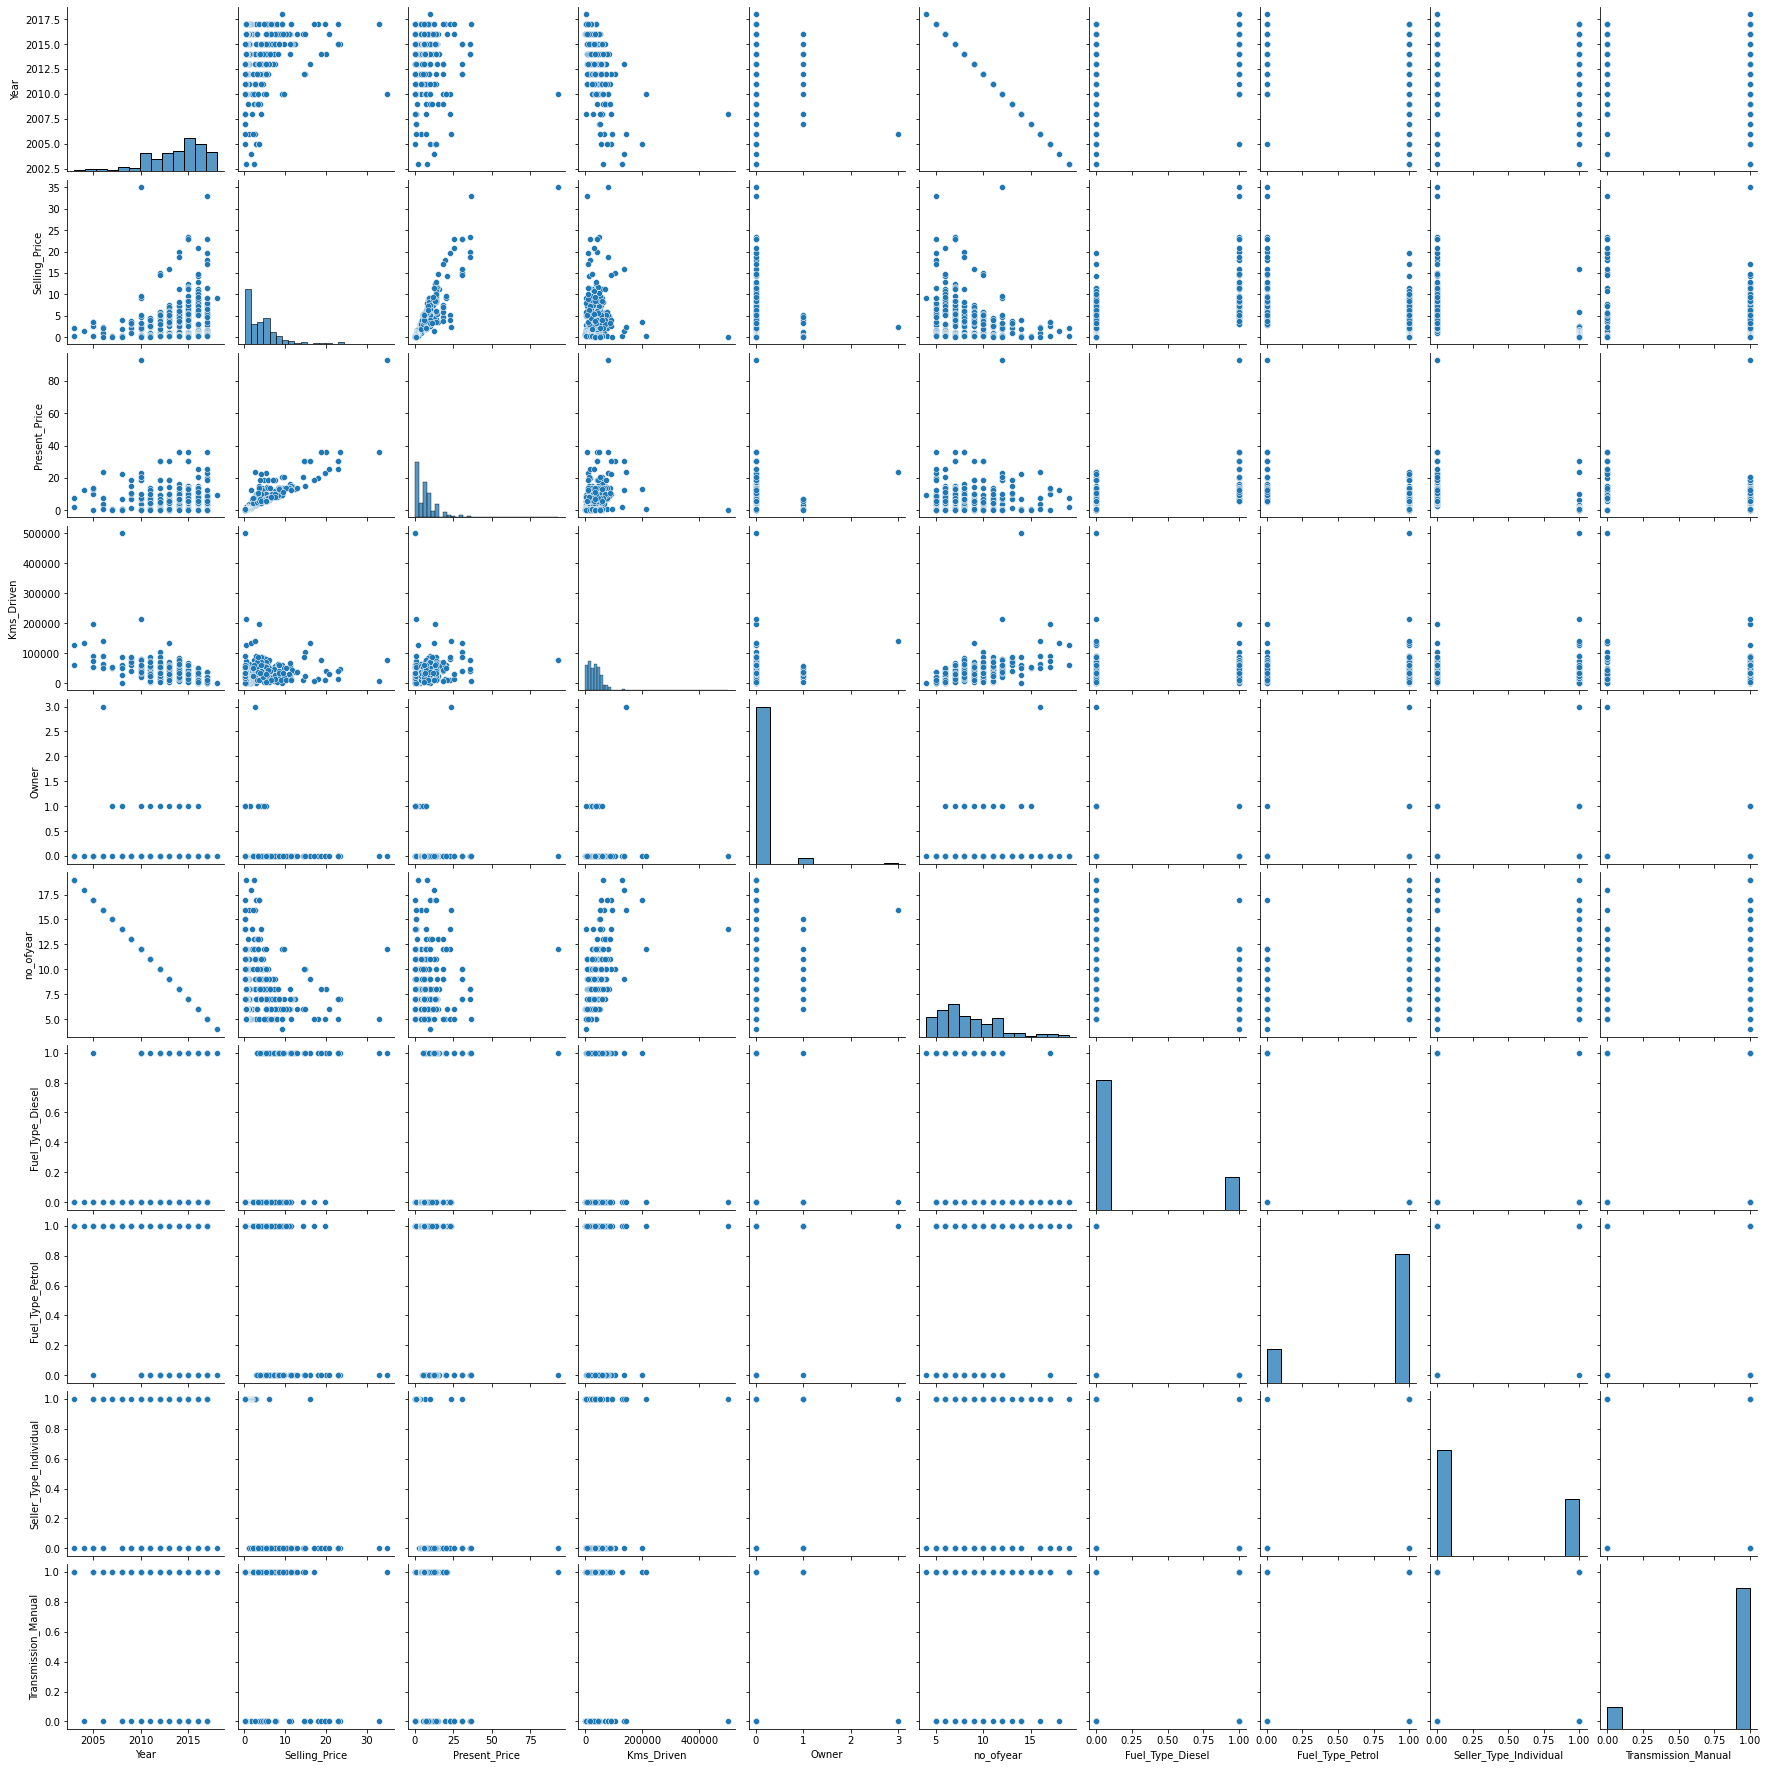

In [23]:
sns.pairplot(final_dataset )

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

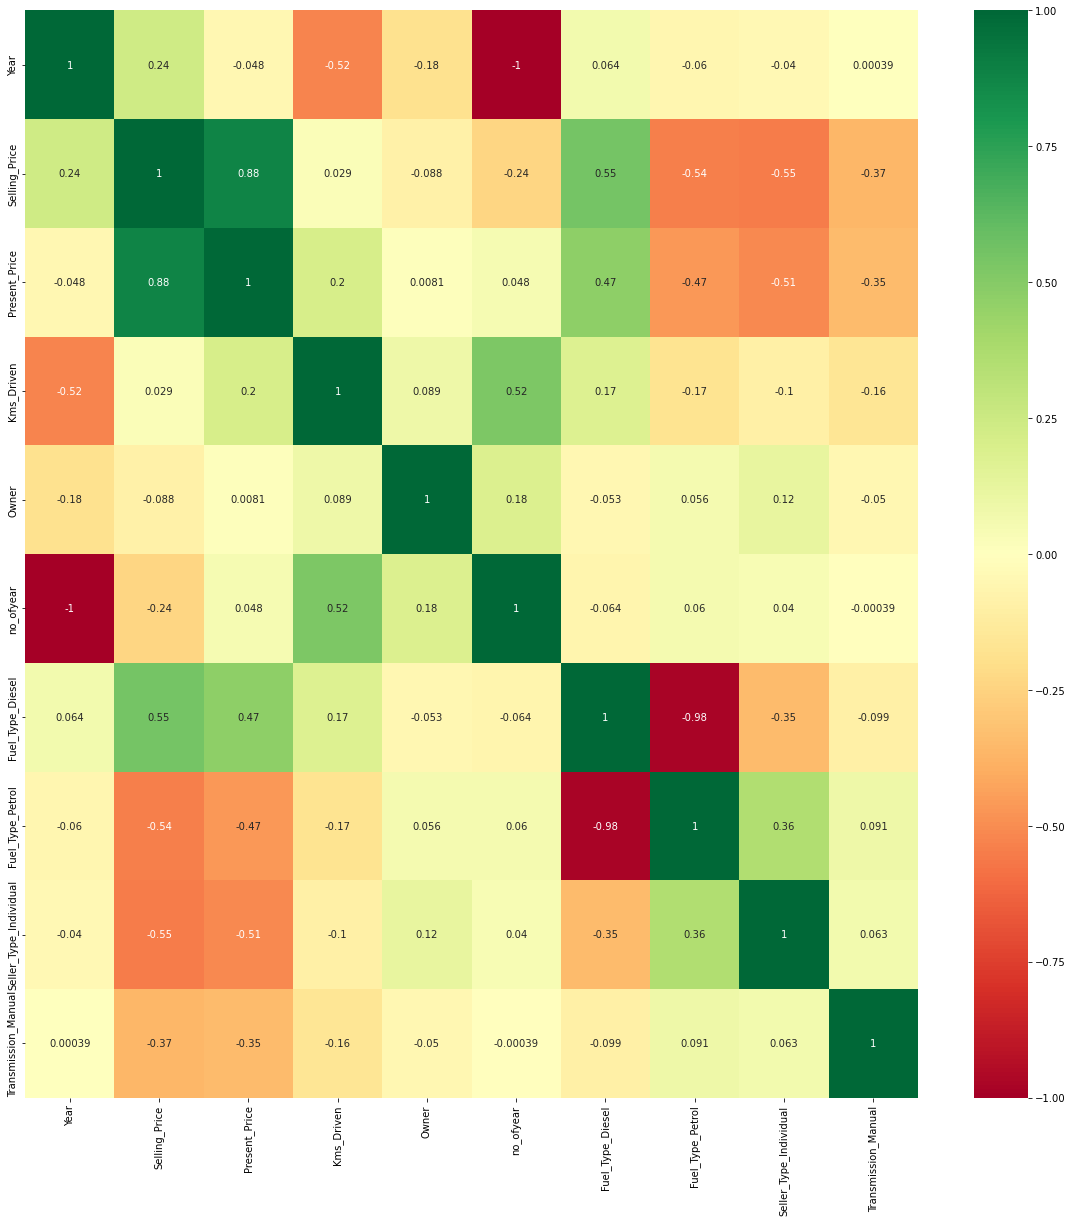

In [25]:
#since the above paiplot dosen't show us a good  description about the data we will instead
# use a heatmap for better analysis 
cormat = final_dataset.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))
#code for heat map 
g= sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [26]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_ofyear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,8,0,1,0,1
1,2013,4.75,9.54,43000,0,9,1,0,0,1
2,2017,7.25,9.85,6900,0,5,0,1,0,1
3,2011,2.85,4.15,5200,0,11,0,1,0,1
4,2014,4.60,6.87,42450,0,8,1,0,0,1


In [27]:
final_dataset.drop(['Year'], axis=1, inplace = True)

In [28]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_ofyear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [29]:
#So now in this dataset, Selling_price will be the independent feature, and everything else will be the dependent one
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [30]:
X.head()

,Present_Price,Kms_Driven,Owner,no_ofyear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [31]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [32]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[0.36509805 0.04343385 0.000425   0.0718893  0.2398394  0.0115287
 0.12513738 0.14264832]


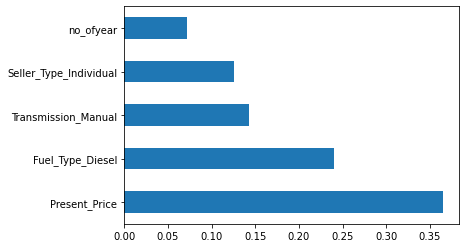

In [34]:
#plot graph of feature importance for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [36]:
X_train.shape

(240, 8)

In [37]:
X_test.shape

(61, 8)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# For hyperparameter 
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [44]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [46]:
rf_random.best_score_

-4.109009816024581

C:\Users\KHUSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

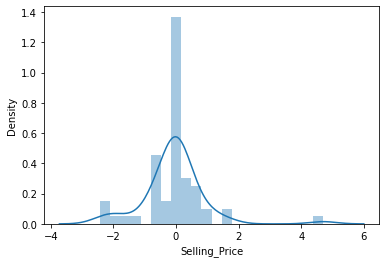

In [47]:
predictions=rf_random.predict(X_test)
sns.distplot(y_test-predictions)

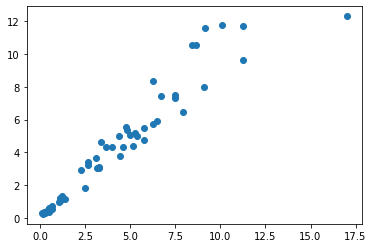

In [48]:
plt.scatter(y_test,predictions)

In [50]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)